#  Pokemon Data - Notebook n° 3

### L'objectif de ce Notebook est de vous présenter les données et lignes de codes qui nous ont permis de développer notre application. Notre but était de vous faire découvrir les pokémons selon différents critères que vous devrez sélectionner, à savoir le type du Pokémon, s'il faut inclure ou non les Pokémons légendaires, et enfin ses statistiques de combat selon des coefficients multiplicatifs.

In [1]:
#Importation des librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Lecture du fichier
df = pd.read_csv("Data.csv", index_col="Pokemon Id")
pd.set_option("max_columns", None)

In [3]:
#Sélection des formes originales
df = df[df["Alternate Form Name"].isna()]

In [4]:
#Ajout d'une colonne "Base Stat Total User"
df["Base Stat Total User"] = 1*df["Health Stat"] + 1*df["Attack Stat"] + 1*df["Defense Stat"] + 1*df["Special Attack Stat"] + 1*df["Special Defense Stat"] + 1*df["Speed Stat"]

In [5]:
#Dataframe composé des légendaires uniquement
df_legendaires = df[df["Legendary Type"].notna()]

In [6]:
def pokemon_tri() :
    """Crée un data frame selon les critères de l'utilisateur"""
    
    #Entrée des données utilisateur
    h, a, d, s_a, s_d, s = -1, -1, -1, -1, -1, -1
    while h < 0 :
        h = float(input("Coefficient de Health Stat : "))
    while a < 0 :
        a = float(input("\nCoefficient de Attack Stat : "))
    while d < 0 :
        d = float(input("\nCoefficient de Defense Stat : "))
    while s_a < 0 :
        s_a = float(input("\nCoefficient de Special Attack Stat : "))
    while s_d < 0 :
        s_d = float(input("\nCoefficient de Special Defense Stat : "))
    while s < 0 :
        s = float(input("\nCoefficient de Speed Stat : "))
    assert((h + a + d + s_a + s_d + s)>0)
    
    #Modification du dataframe selon les données utilisateur
    df_modified = df
    df_modified["Base Stat Total User"] = h*df_modified["Health Stat"] + a*df_modified["Attack Stat"] + d*df_modified["Defense Stat"] + s_a*df_modified["Special Attack Stat"] + s_d*df_modified["Special Defense Stat"] + s*df_modified["Speed Stat"]
    
    #Tri du dataframe selon les données utilisateur
    print("\nLegendary :")
    l = None
    categorie = ["avec","seulement","sans"]
    while l not in categorie :
        l = input(f"\n{categorie}\nVotre réponse : ")
    if l=="seulement" :
        df_modified = df_modified[df_modified["Legendary Type"].notna()]
    if l=="sans" :
        df_modified = df_modified[df_modified["Legendary Type"].isna()]
    
    #Tri du dataframe selon les données utilisateur
    print("\nPrimary Type :")
    t = None
    types = list(df["Primary Type"].unique())
    types.append("None")
    types = sorted(types)
    while t not in types :
        t = input(f"\n{types}\nVotre réponse : ")
    if t in list(df["Primary Type"].unique()) :
        df_modified = df_modified[df_modified["Primary Type"]==t]
    return(df_modified.sort_values(by="Base Stat Total User",ascending=False))

In [7]:
def pokemon_classement(n) :
    """Affiche les n meilleurs Pokemon selon les critères de l'utilisateur"""
    
    #Appel d'une fonction
    df = pokemon_tri()
    
    #Affichage d'un histogramme
    if len(df)>0 :
        plt.figure(figsize=(20,10))
        sns.barplot(
            data=df.head(n),
            x="Base Stat Total User",
            y="Pokemon Name"
        )
        plt.xlim(df["Base Stat Total User"].head(n).min()-10, df["Base Stat Total User"].head(n).max()+10)
        return(df.head(n))
    else :
        print(f"\n{None}")
        return()

### C'est à partir d'ici que vous pourrez sélectionner vos critères afin de faire le test

Toutefois, une meilleure prise en main vous attend sur Heroku.

Coefficient de Health Stat : 2

Coefficient de Attack Stat : 2

Coefficient de Defense Stat : 1

Coefficient de Special Attack Stat : 2

Coefficient de Special Defense Stat : 1

Coefficient de Speed Stat : 1

Legendary :

['avec', 'seulement', 'sans']
Votre réponse : avec

Primary Type :

['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'None', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water']
Votre réponse : Water


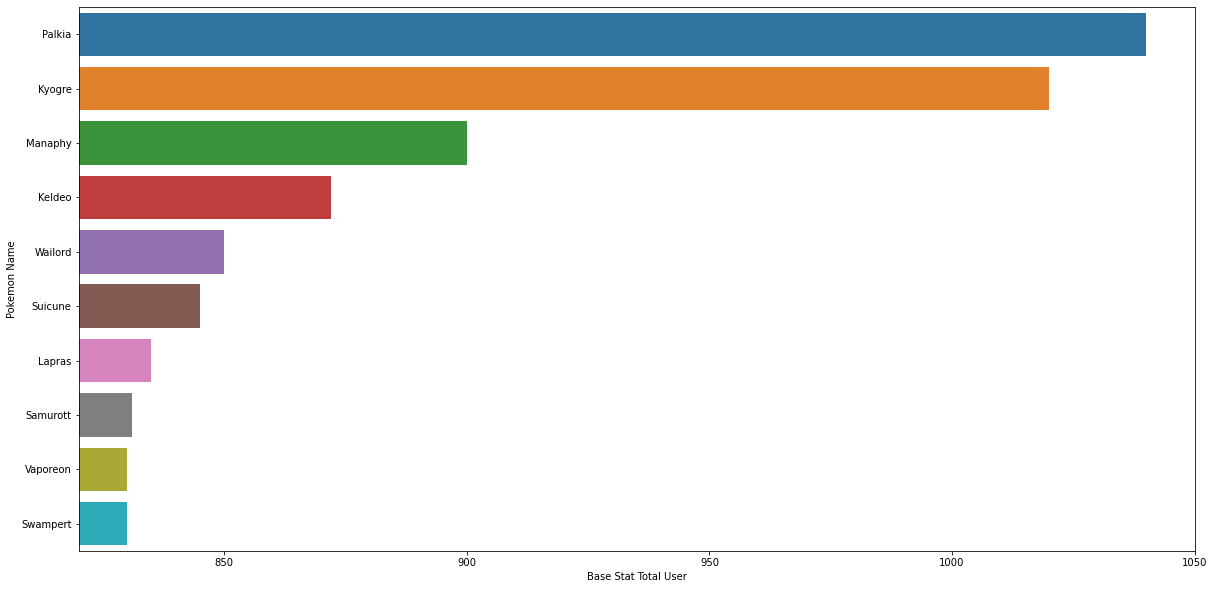

In [8]:
#Appel d'une fonction
classement = pokemon_classement(10)

In [9]:
#Affichage d'un pivot_table
pd.pivot_table(
    data=classement,
    columns=["Pokemon Name"],
    values=["Base Stat Total User"]
)

Pokemon Name,Keldeo,Kyogre,Lapras,Manaphy,Palkia,Samurott,Suicune,Swampert,Vaporeon,Wailord
Base Stat Total User,872.0,1020.0,835.0,900.0,1040.0,831.0,845.0,830.0,830.0,850.0
